### Data visualization With Seaborn

Seaborn is a Python visualization library based on Matplotlib that proides a high-level interface for drawing attractive and informative statistical graphics. Seaborn helps in creating complex visualizations with just a few lines of code. In this lesson, we will cover the basics of Seaborn, including creating various types of plots and customizing them.

In [1]:
!pip install seaborn

In [2]:
import seaborn as sns

In [5]:
### Basic Plotting With Seaborn
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


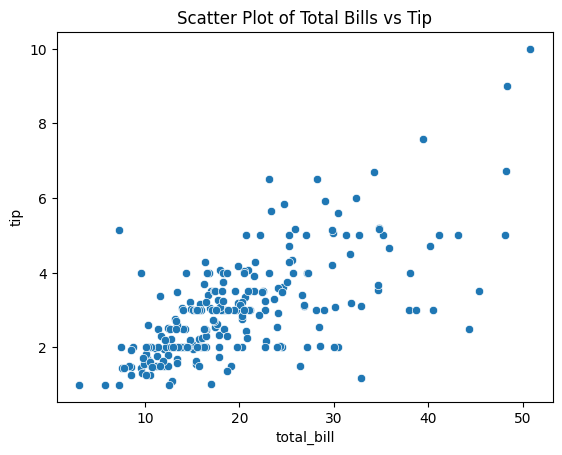

In [8]:
## Create a scatter plot
import matplotlib.pyplot as plt

sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title("Scatter Plot of Total Bills vs Tip")
plt.show()

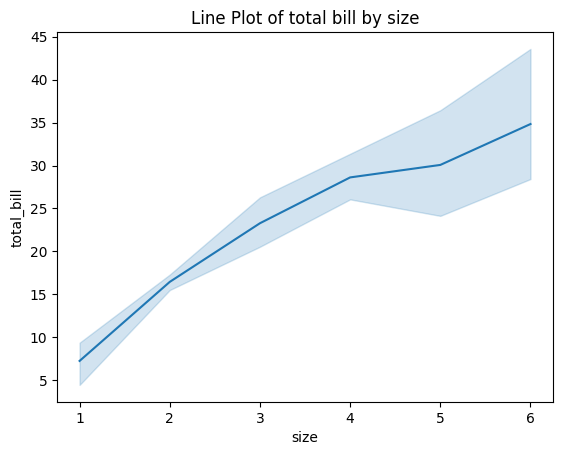

In [9]:
## line Plot

sns.lineplot(x='size', y='total_bill', data=tips)
plt.title("Line Plot of total bill by size")
plt.show()

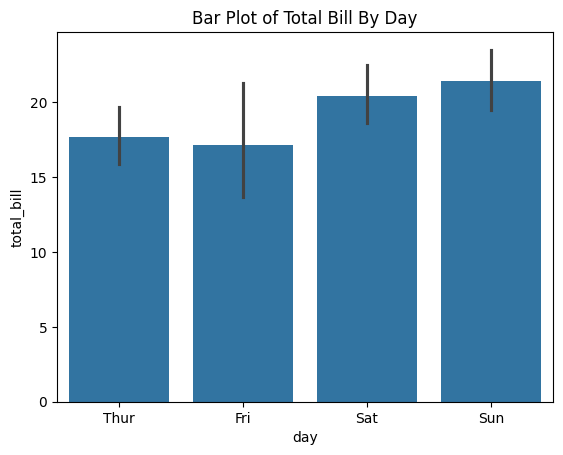

In [10]:
## Categorical Plots
# Bar Plot
sns.barplot(x='day', y='total_bill', data=tips)
plt.title("Bar Plot of Total Bill By Day")
plt.show()

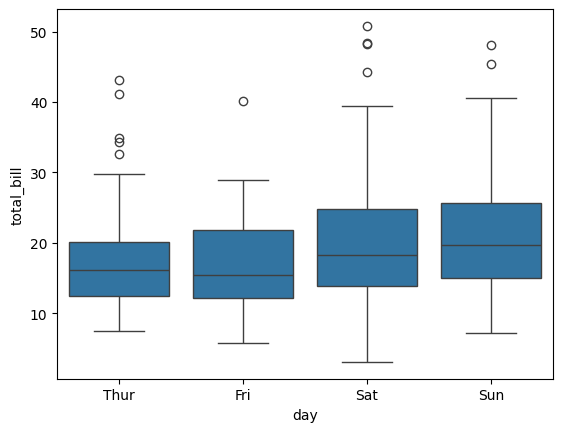

In [11]:
## Box Plot
sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

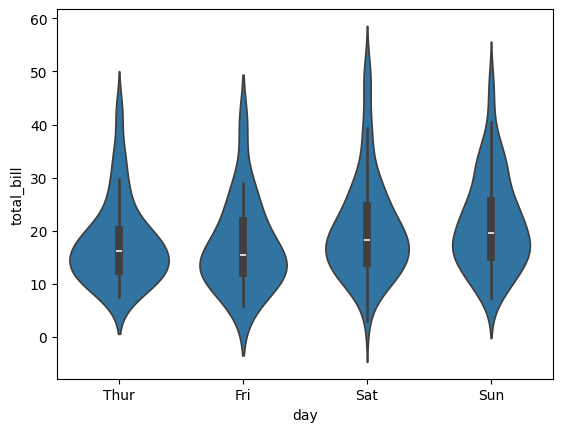

In [12]:
## Violin Plot
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

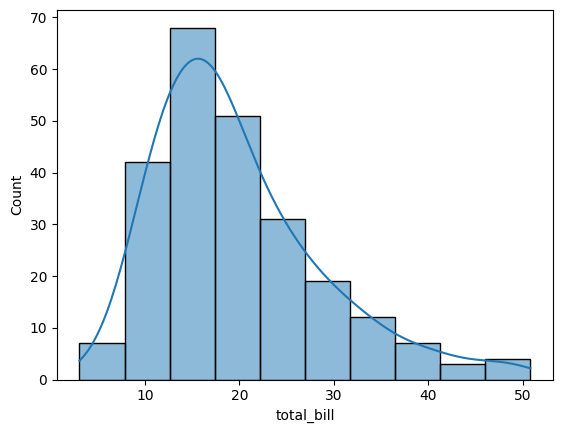

In [16]:
### Histograms
sns.histplot(tips['total_bill'], bins=10, kde=True)
plt.show()

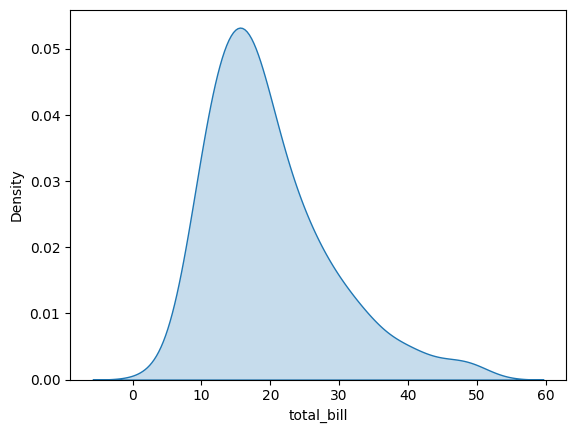

In [18]:
## KDE Plot
sns.kdeplot(tips['total_bill'], fill=True)
plt.show()

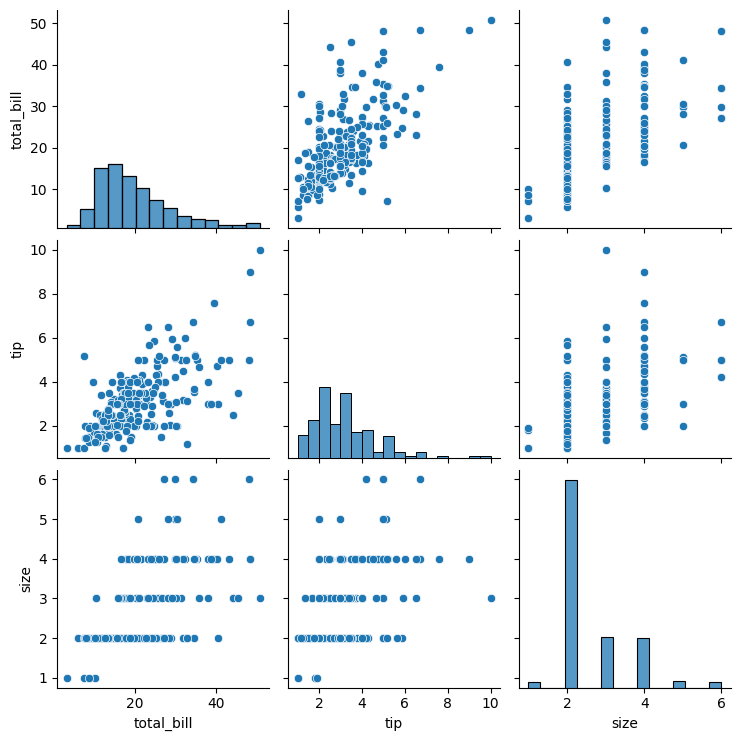

In [19]:
## Pair plot
sns.pairplot(tips)

<Axes: >

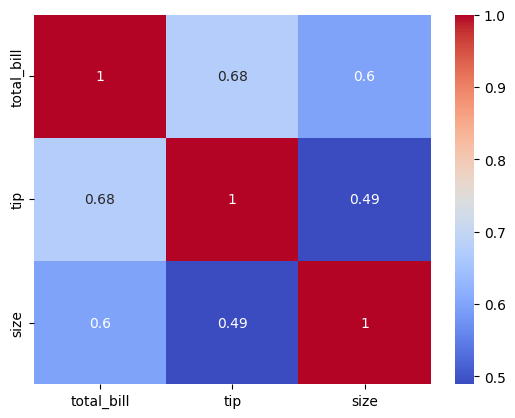

In [22]:
## Heatmap

corr=tips[['total_bill', 'tip', 'size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [23]:
import pandas as pd

pokemon_df = pd.read_csv("./dataset/Pokemon.csv")
pokemon_df.head(5)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


/tmp/ipykernel_261981/4102468166.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


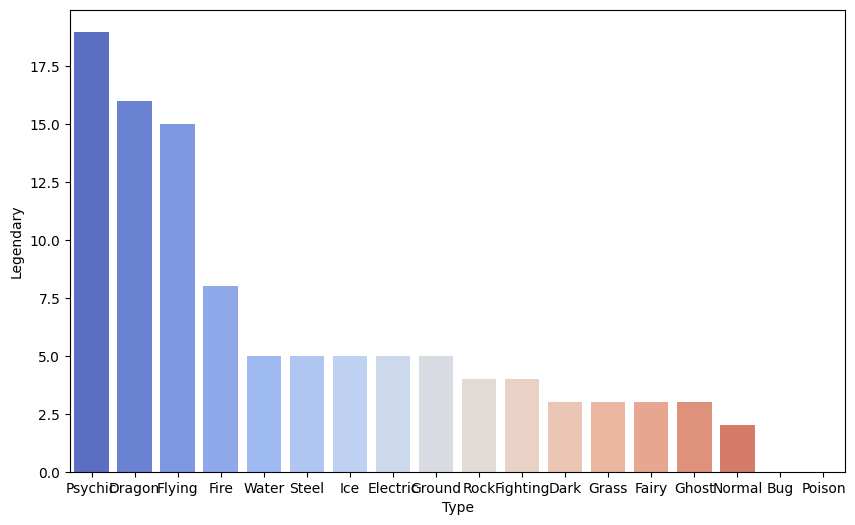

In [49]:
all_types = pd.concat([
    pokemon_df[['Legendary', 'Type 1']].rename(columns={'Type 1': 'Type'}),
    pokemon_df[['Legendary', 'Type 2']].dropna().rename(columns={'Type 2': 'Type'})
])

# Conta quantos pokémons têm cada tipo (como primário ou secundário)
legendary_by_type = all_types.groupby('Type')['Legendary'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='Type',
    y='Legendary',
    data=legendary_by_type,
    estimator=sum,
    palette='coolwarm',
    errorbar=None,
    order=legendary_by_type['Type'])
plt.show()